<a href="https://colab.research.google.com/github/farhaanqazi/F21MP/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import statistics

In [ ]:
# Load the dataset
url = 'https://raw.githubusercontent.com/farhaanqazi/F21MP/main/dataset.csv'
df = pd.read_csv(url)

In [ ]:
print (df['ID'])


# Set the Pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print or view all values in the 'ID' column
print(df['ID'])

# Reset the Pandas display options to default if needed
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

print (df['ID'])

0      10
1      10
2      10
3      10
4       1
       ..
320     8
321     9
322     9
323     9
324     9
Name: ID, Length: 325, dtype: int64
0      10
1      10
2      10
3      10
4       1
5       1
6       1
7       1
8      11
9      11
10     11
11     11
12     12
13     12
14     12
15     12
16     13
17     13
18     13
19     13
20     14
21     14
22     14
23     14
24     15
25     15
26     15
27     15
28     16
29     16
30     16
31     16
32     17
33     17
34     17
35     17
36     18
37     18
38     18
39     18
40     19
41     19
42     19
43     19
44      2
45      2
46      2
47     23
48     23
49     23
50     23
51     24
52     24
53     24
54     24
55     25
56     25
57     25
58     25
59     26
60     26
61     26
62     26
63     27
64     27
65     27
66     27
67     28
68     28
69     28
70     28
71     29
72     29
73     29
74     29
75      3
76      3
77      3
78      3
79      4
80      4
81      4
82      4
83      5
84      5
85  

In [ ]:
# print (df['ID'])
# print (df['PC'])

combined_columns = pd.concat([df['Duration'], df['PC']], axis=1)
print(combined_columns)

     Duration  PC
0         0.0   0
1         0.0   0
2         0.0   0
3         0.0   0
4         0.0   0
..        ...  ..
320       1.5   1
321       7.0   1
322       7.0   1
323       7.0   1
324       7.0   1

[325 rows x 2 columns]


In [ ]:
# Define a function to detect outliers using z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return (z_scores > threshold).any()

# Define a function to detect outliers using IQR
def detect_outliers_iqr(data, threshold=1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return ((data < lower_bound) | (data > upper_bound)).any()

# Check for outliers in each column
columns_with_outliers_zscore = df.apply(detect_outliers_zscore)
columns_with_outliers_iqr = df.apply(detect_outliers_iqr)

# Print columns with outliers using z-score method
print("Columns with outliers (z-score):")
print(columns_with_outliers_zscore)

# Print columns with outliers using IQR method
print("\nColumns with outliers (IQR):")
print(columns_with_outliers_iqr)

Columns with outliers (z-score):
ID                 False
Dominant           False
Attempts           False
PC                 False
Duration            True
Time                True
AreaError           True
TimeTriangles_1     True
TimeTriangles_2     True
TimeTriangles_3     True
TimeTriangles_4     True
TimeTriangles_5     True
Distance            True
LeaveSurface        True
Side               False
TimeContact         True
ZeroVel             True
ZeroAcc             True
dtype: bool

Columns with outliers (IQR):
ID                 False
Dominant           False
Attempts           False
PC                 False
Duration            True
Time                True
AreaError           True
TimeTriangles_1     True
TimeTriangles_2     True
TimeTriangles_3     True
TimeTriangles_4     True
TimeTriangles_5     True
Distance            True
LeaveSurface        True
Side                True
TimeContact         True
ZeroVel             True
ZeroAcc             True
dtype: bool


In [ ]:
def replace_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    data[z_scores > threshold] = np.nan
    return data

# Check for outliers in each column and replace them with null values
df_with_nulls = df.apply(replace_outliers_zscore)

# Print the dataframe with null values for outliers
df_with_nulls

,ID,Dominant,Attempts,PC,Duration,Time,AreaError,TimeTriangles_1,TimeTriangles_2,TimeTriangles_3,TimeTriangles_4,TimeTriangles_5,Distance,LeaveSurface,Side,TimeContact,ZeroVel,ZeroAcc
0,10,1,1,0,0.0,35.590,111.675922,9957.0,4331.0,5062.0,8047.0,7954.0,5.659210,1.0,1,34.350,3.895,2.795
1,10,1,2,0,0.0,27.735,106.825450,7185.0,5986.0,4701.0,5561.0,5879.0,4.758624,1.0,1,27.710,2.945,2.055
2,10,0,1,0,0.0,29.715,161.018418,7985.0,6858.0,6045.0,4363.0,5043.0,4.857465,2.0,1,29.660,2.120,2.055
3,10,0,2,0,0.0,26.650,116.310537,6564.0,6000.0,4420.0,5327.0,4752.0,4.837145,1.0,1,26.575,1.360,1.430
4,1,1,1,0,0.0,39.665,167.348008,11905.0,6366.0,8245.0,7358.0,8737.0,5.116981,1.0,1,39.650,3.705,4.165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,8,0,2,1,1.5,32.150,147.944077,6985.0,6174.0,6903.0,6450.0,5783.0,4.645332,1.0,1,32.105,1.015,3.435
321,9,1,1,1,7.0,33.410,125.701464,10191.0,9231.0,2719.0,6875.0,7719.0,5.839282,2.0,1,29.795,4.725,3.165
322,9,1,2,1,7.0,23.935,117.619378,7644.0,3719.0,5001.0,4640.0,3889.0,4.784715,1.0,1,23.845,3.290,2.170
323,9,0,1,1,7.0,24.750,204.258680,8180.0,5376.0,3889.0,3849.0,4531.0,4.802904,1.0,1,24.680,2.390,2.100


In [ ]:
from sklearn.impute import KNNImputer


# Apply KNN imputation to handle missing values
knn_imputer = KNNImputer()
PDdata_imputed_data = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

# Print the replaced data
print("Replaced Data:")
print(PDdata_imputed_data)


Replaced Data:
       ID  Dominant  Attempts   PC  Duration    Time   AreaError  \
0    10.0       1.0       1.0  0.0       0.0  35.590  111.675922   
1    10.0       1.0       2.0  0.0       0.0  27.735  106.825450   
2    10.0       0.0       1.0  0.0       0.0  29.715  161.018418   
3    10.0       0.0       2.0  0.0       0.0  26.650  116.310537   
4     1.0       1.0       1.0  0.0       0.0  39.665  167.348008   
..    ...       ...       ...  ...       ...     ...         ...   
320   8.0       0.0       2.0  1.0       1.5  32.150  147.944077   
321   9.0       1.0       1.0  1.0       7.0  33.410  125.701464   
322   9.0       1.0       2.0  1.0       7.0  23.935  117.619378   
323   9.0       0.0       1.0  1.0       7.0  24.750  204.258680   
324   9.0       0.0       2.0  1.0       7.0  22.545  131.566725   

     TimeTriangles_1  TimeTriangles_2  TimeTriangles_3  TimeTriangles_4  \
0             9957.0           4331.0           5062.0           8047.0   
1             7185

In [ ]:
df=PDdata_imputed_data

In [ ]:
 df.drop('Duration', axis=1, inplace=True)
 df.drop('ID', axis=1, inplace=True)

In [ ]:
# # Separate the features and target variable
X = df.drop('PC', axis=1)  # Replace 'target_variable' with the actual column name
y = df['PC']  # Replace 'target_variable' with the actual column name

In [ ]:
# Preprocess the data
# Here, you can apply various preprocessing steps such as handling missing values and scaling numerical features
# You can also perform one-hot encoding for categorical variables if needed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling on numerical features
numeric_features = X.select_dtypes(include='number').columns
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Create an MLP classifier
model = MLPClassifier(hidden_layer_sizes=(50, 30), activation='relu', solver='adam', random_state=42, max_iter=500)

# Train the MLP classifier
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

# Apply cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # Perform 5-fold cross-validation
formatted_cv_scores = [f"{score:.4f}" for score in cv_scores]

# Calculate standard deviation
std_dev = statistics.stdev(cv_scores)

# Calculate the average accuracy across all folds
cv_accuracy = cv_scores.mean()

# Calculate training accuracy
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate testing accuracy
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)


# Calculate precision, recall, sensitivity, and specificity
precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)
true_negative = np.sum((y_pred == 0) & (y_test == 0))
false_positive = np.sum((y_pred == 1) & (y_test == 0))
false_negative = np.sum((y_pred == 0) & (y_test == 1))
true_positive = np.sum((y_pred == 1) & (y_test == 1))
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)




#print all the evaluations
print("---------------------")
print("Model: ", model)

# Print the accuracy scores for each fold
print("---------------------")
print("---------------------")
print(f"Cross-validation scores: ", formatted_cv_scores)
print(f"CV Scores Standard deviation:, {std_dev:.4f}")

print(f"Cross-validation accuracy:, {cv_accuracy:.4f}")
print("---------------------")
print("---------------------")

print(f"Model Accuracy:, {accuracy:.4f}")
print(f"Training Accuracy:  {train_accuracy:.4f}"   )
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity:  {specificity:.4f}")
print("---------------------")
print("---------------------")
print("---------------------")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

---------------------
Model:  MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
---------------------
---------------------
Cross-validation scores:  ['0.7115', '0.6731', '0.6731', '0.8077', '0.6731']
CV Scores Standard deviation:, 0.0583
Cross-validation accuracy:, 0.7077
---------------------
---------------------
Model Accuracy:, 0.6769
Training Accuracy:  0.9885
Testing Accuracy: 0.6769
Precision:  0.7083
Sensitivity: 0.8293
Specificity:  0.4167
---------------------
---------------------
---------------------


In [ ]:
from tabulate import tabulate

# ...

# Define the output data as a list of lists
output_data = [
    ["Model:",  model],
    ["Cross-validation scores:", formatted_cv_scores],
    ["CV Scores Standard deviation:", f"{std_dev:.4f}"],
    ["Cross-validation accuracy:", f"{cv_accuracy:.4f}"],
    ["Model Accuracy:", f"{test_accuracy:.4f}"],
    ["Training Accuracy:", f"{train_accuracy:.4f}"],
    ["Testing Accuracy:", f"{test_accuracy:.4f}"],
    ["Precision:", f"{precision:.4f}"],
    ["Sensitivity:", f"{sensitivity:.4f}"],
    ["Specificity:", f"{specificity:.4f}"]
]

# Tabulate the output data
table = tabulate(output_data, headers=["Description", "Value"], tablefmt="fancy_grid")

# Print the table
print(table)


╒═══════════════════════════════╤═══════════════════════════════════════════════════════════════════════════╕
│ Description                   │ Value                                                                     │
╞═══════════════════════════════╪═══════════════════════════════════════════════════════════════════════════╡
│ Model:                        │ MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42) │
├───────────────────────────────┼───────────────────────────────────────────────────────────────────────────┤
│ Cross-validation scores:      │ ['0.7115', '0.6731', '0.6731', '0.8077', '0.6731']                        │
├───────────────────────────────┼───────────────────────────────────────────────────────────────────────────┤
│ CV Scores Standard deviation: │ 0.0583                                                                    │
├───────────────────────────────┼───────────────────────────────────────────────────────────────────────────┤
│ Cross-va

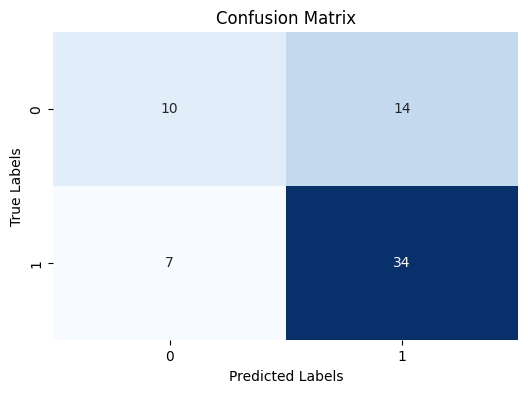

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define labels for the different parts of the confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Create a function to label the cells
def label_confusion_matrix(ax):
    for i in range(2):
        for j in range(2):
            ax.text(j + 0.5, i + 0.5, labels[i * 2 + j] + '\n' + str(cm[i, j]), ha='center', va='center', color='black')


# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


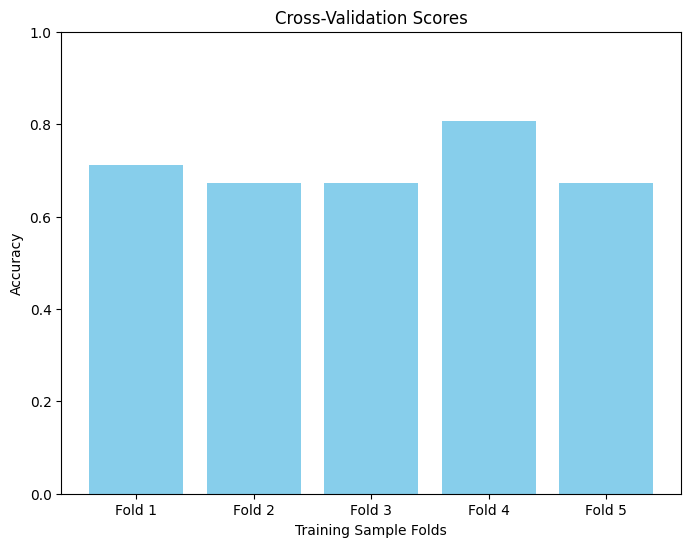

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Replace 'cv_scores' with the actual cross-validation scores from your code
# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(range(len(cv_scores)), cv_scores, color='skyblue')
plt.xlabel('Training Sample Folds')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.xticks(range(len(cv_scores)), [f"Fold {i+1}" for i in range(len(cv_scores))])
plt.ylim(0, 1.0)  # Set the y-axis limit to ensure consistent scaling
plt.show()


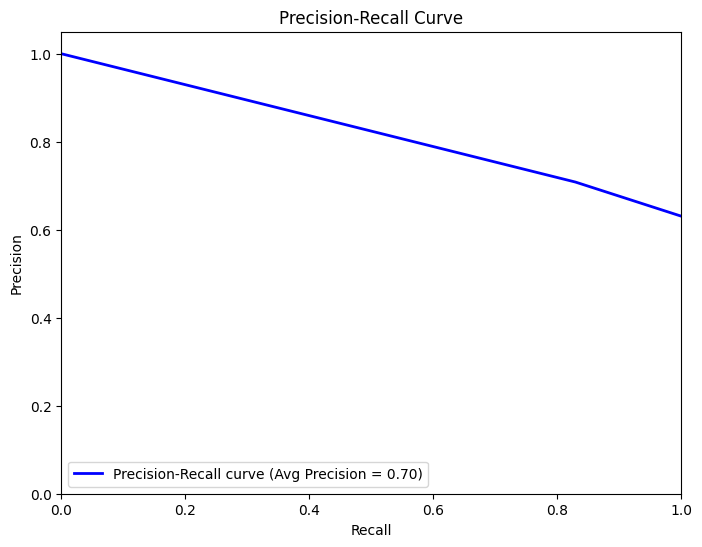

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Replace 'y_test' with the true labels and 'y_pred' with the predicted probabilities or binary predictions from your code
# If your model outputs probabilities, make sure to use probabilities, not binary predictions.
# If using binary predictions, make sure to get the predicted probabilities using `model.predict_proba(X_test)[:, 1]`.
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Calculate the average precision score
avg_precision = average_precision_score(y_test, y_pred)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (Avg Precision = %0.2f)' % avg_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()


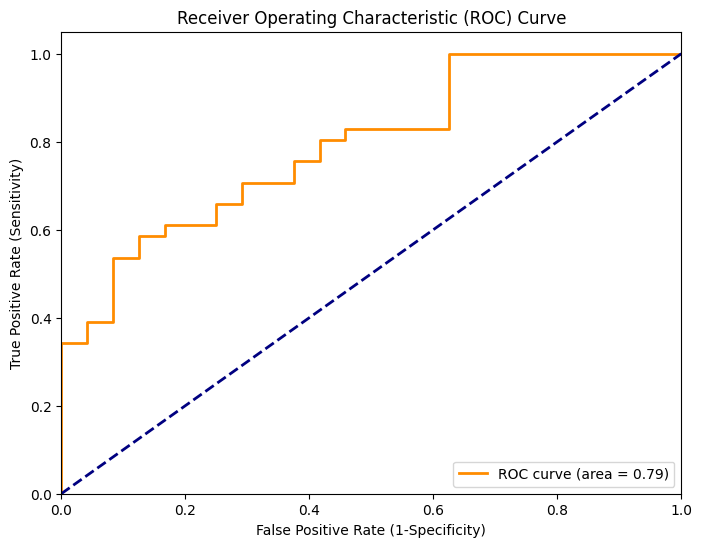

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 5: Make predictions on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Step 6: Calculate the ROC curve and plot it
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()